# Heart Stroke Prediction

In [1]:
# Importing Liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,
                                GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import (accuracy_score, mean_absolute_error, 
                            f1_score, mean_squared_error,log_loss,
                            classification_report,confusion_matrix)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#1. Function to check missing data
def missing_data(df):
    """
    Objectives
    --------------
    it shows the missing data in each column with 
    total missing values, percentage of missing values and
    its data type in descending order.

    parameter
    ----------
    df: pandas dataframe
        input data frame

    returns
    -------
    missing data: output data frame(pandas dataframe)

    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False),2)
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],
                             axis=1,
                             keys=['Total', 'Percent','Data_Types']).sort_values('Total', axis=0,ascending= False)
    return missing_data

In [3]:
df= pd.read_csv(r"healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# df.drop('id',axis=1,inplace=True)
df.set_index('id',inplace=True)

## Data preprocessing

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
missing_data(df)

,Total,Percent,Data_Types
bmi,201,3.93,float64
gender,0,0.00,object
age,0,0.00,float64
hypertension,0,0.00,int64
heart_disease,0,0.00,int64
ever_married,0,0.00,object
work_type,0,0.00,object
Residence_type,0,0.00,object
avg_glucose_level,0,0.00,float64
smoking_status,0,0.00,object


In [11]:
df['age'].astype(int)

id
9046     67
51676    61
31112    80
60182    49
1665     79
         ..
18234    80
44873    81
19723    35
37544    51
44679    44
Name: age, Length: 5110, dtype: int32

In [12]:
#CHecking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Check values and their count in the columns

In [13]:
for col in df.columns:
    print(f"--------------{col}----------------")
    print(df[col].value_counts())
    print()
    
    

--------------gender----------------
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

--------------age----------------
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

--------------hypertension----------------
hypertension
0    4612
1     498
Name: count, dtype: int64

--------------heart_disease----------------
heart_disease
0    4834
1     276
Name: count, dtype: int64

--------------ever_married----------------
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

--------------work_type----------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

--------------Residence_type----------------
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

--------------avg_glucose_level---------------

In [14]:
## replacing the missing values with the most frequent values
df['bmi'].fillna(df['bmi'].mode()[0],inplace=True)

## Replacing the values in columns with numerical values

- Residence Type : Urban = 1 , Rural= 0
- Ever_married: 'Yes'=1, 'No'=0
- Gender: 'Male'=1,'Female'=0,'Other'=2
- Smoking_status: 'formerly smoked'=0,'never smoked'=1,'smoked'=2,'Unknown'=3
- Work_type: 'Private'=0, 'Self-employed'=1, 'children'=2, 'Govt_job'=3,'Never_worked'=4

In [15]:
df['ever_married'].replace({'Yes':1, 'No':0},inplace=True)
df['gender'].replace({'Male':1,'Female':0,'Other':2},inplace=True)
df['Residence_type'].replace({'Urban':1,'Rural':0},inplace=True)
df['smoking_status'].replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3},inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3,'Never_worked':4},inplace=True)


In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,0,1,228.69,36.6,0,1
51676,0,61.0,0,0,1,1,0,202.21,28.7,1,1
31112,1,80.0,0,1,1,0,0,105.92,32.5,1,1
60182,0,49.0,0,0,1,0,1,171.23,34.4,2,1
1665,0,79.0,1,0,1,1,0,174.12,24.0,1,1


## Visulaizing the data

<Axes: xlabel='Residence_type', ylabel='count'>

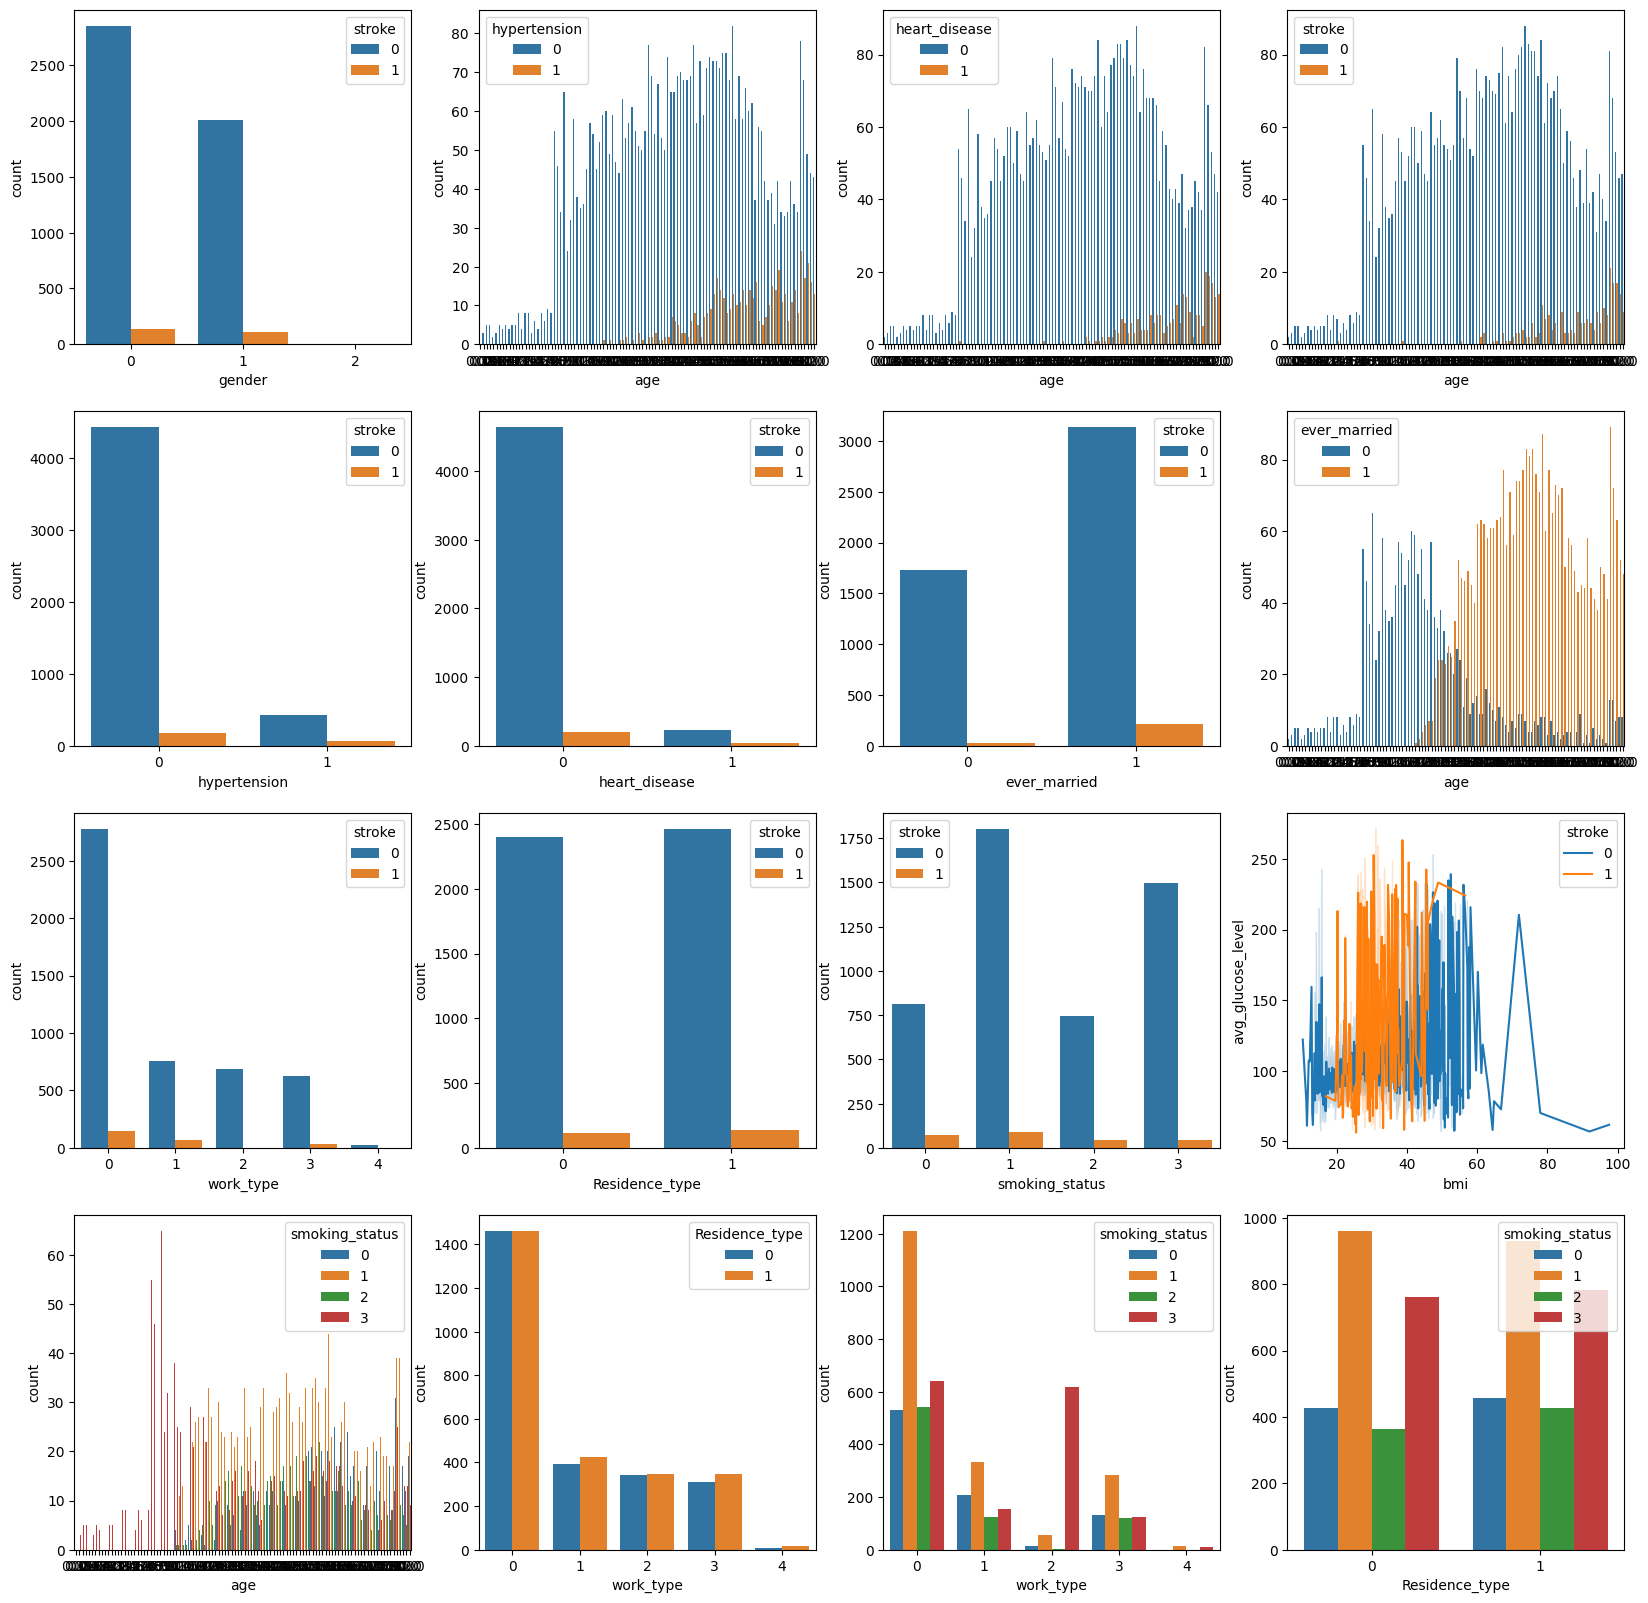

In [17]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

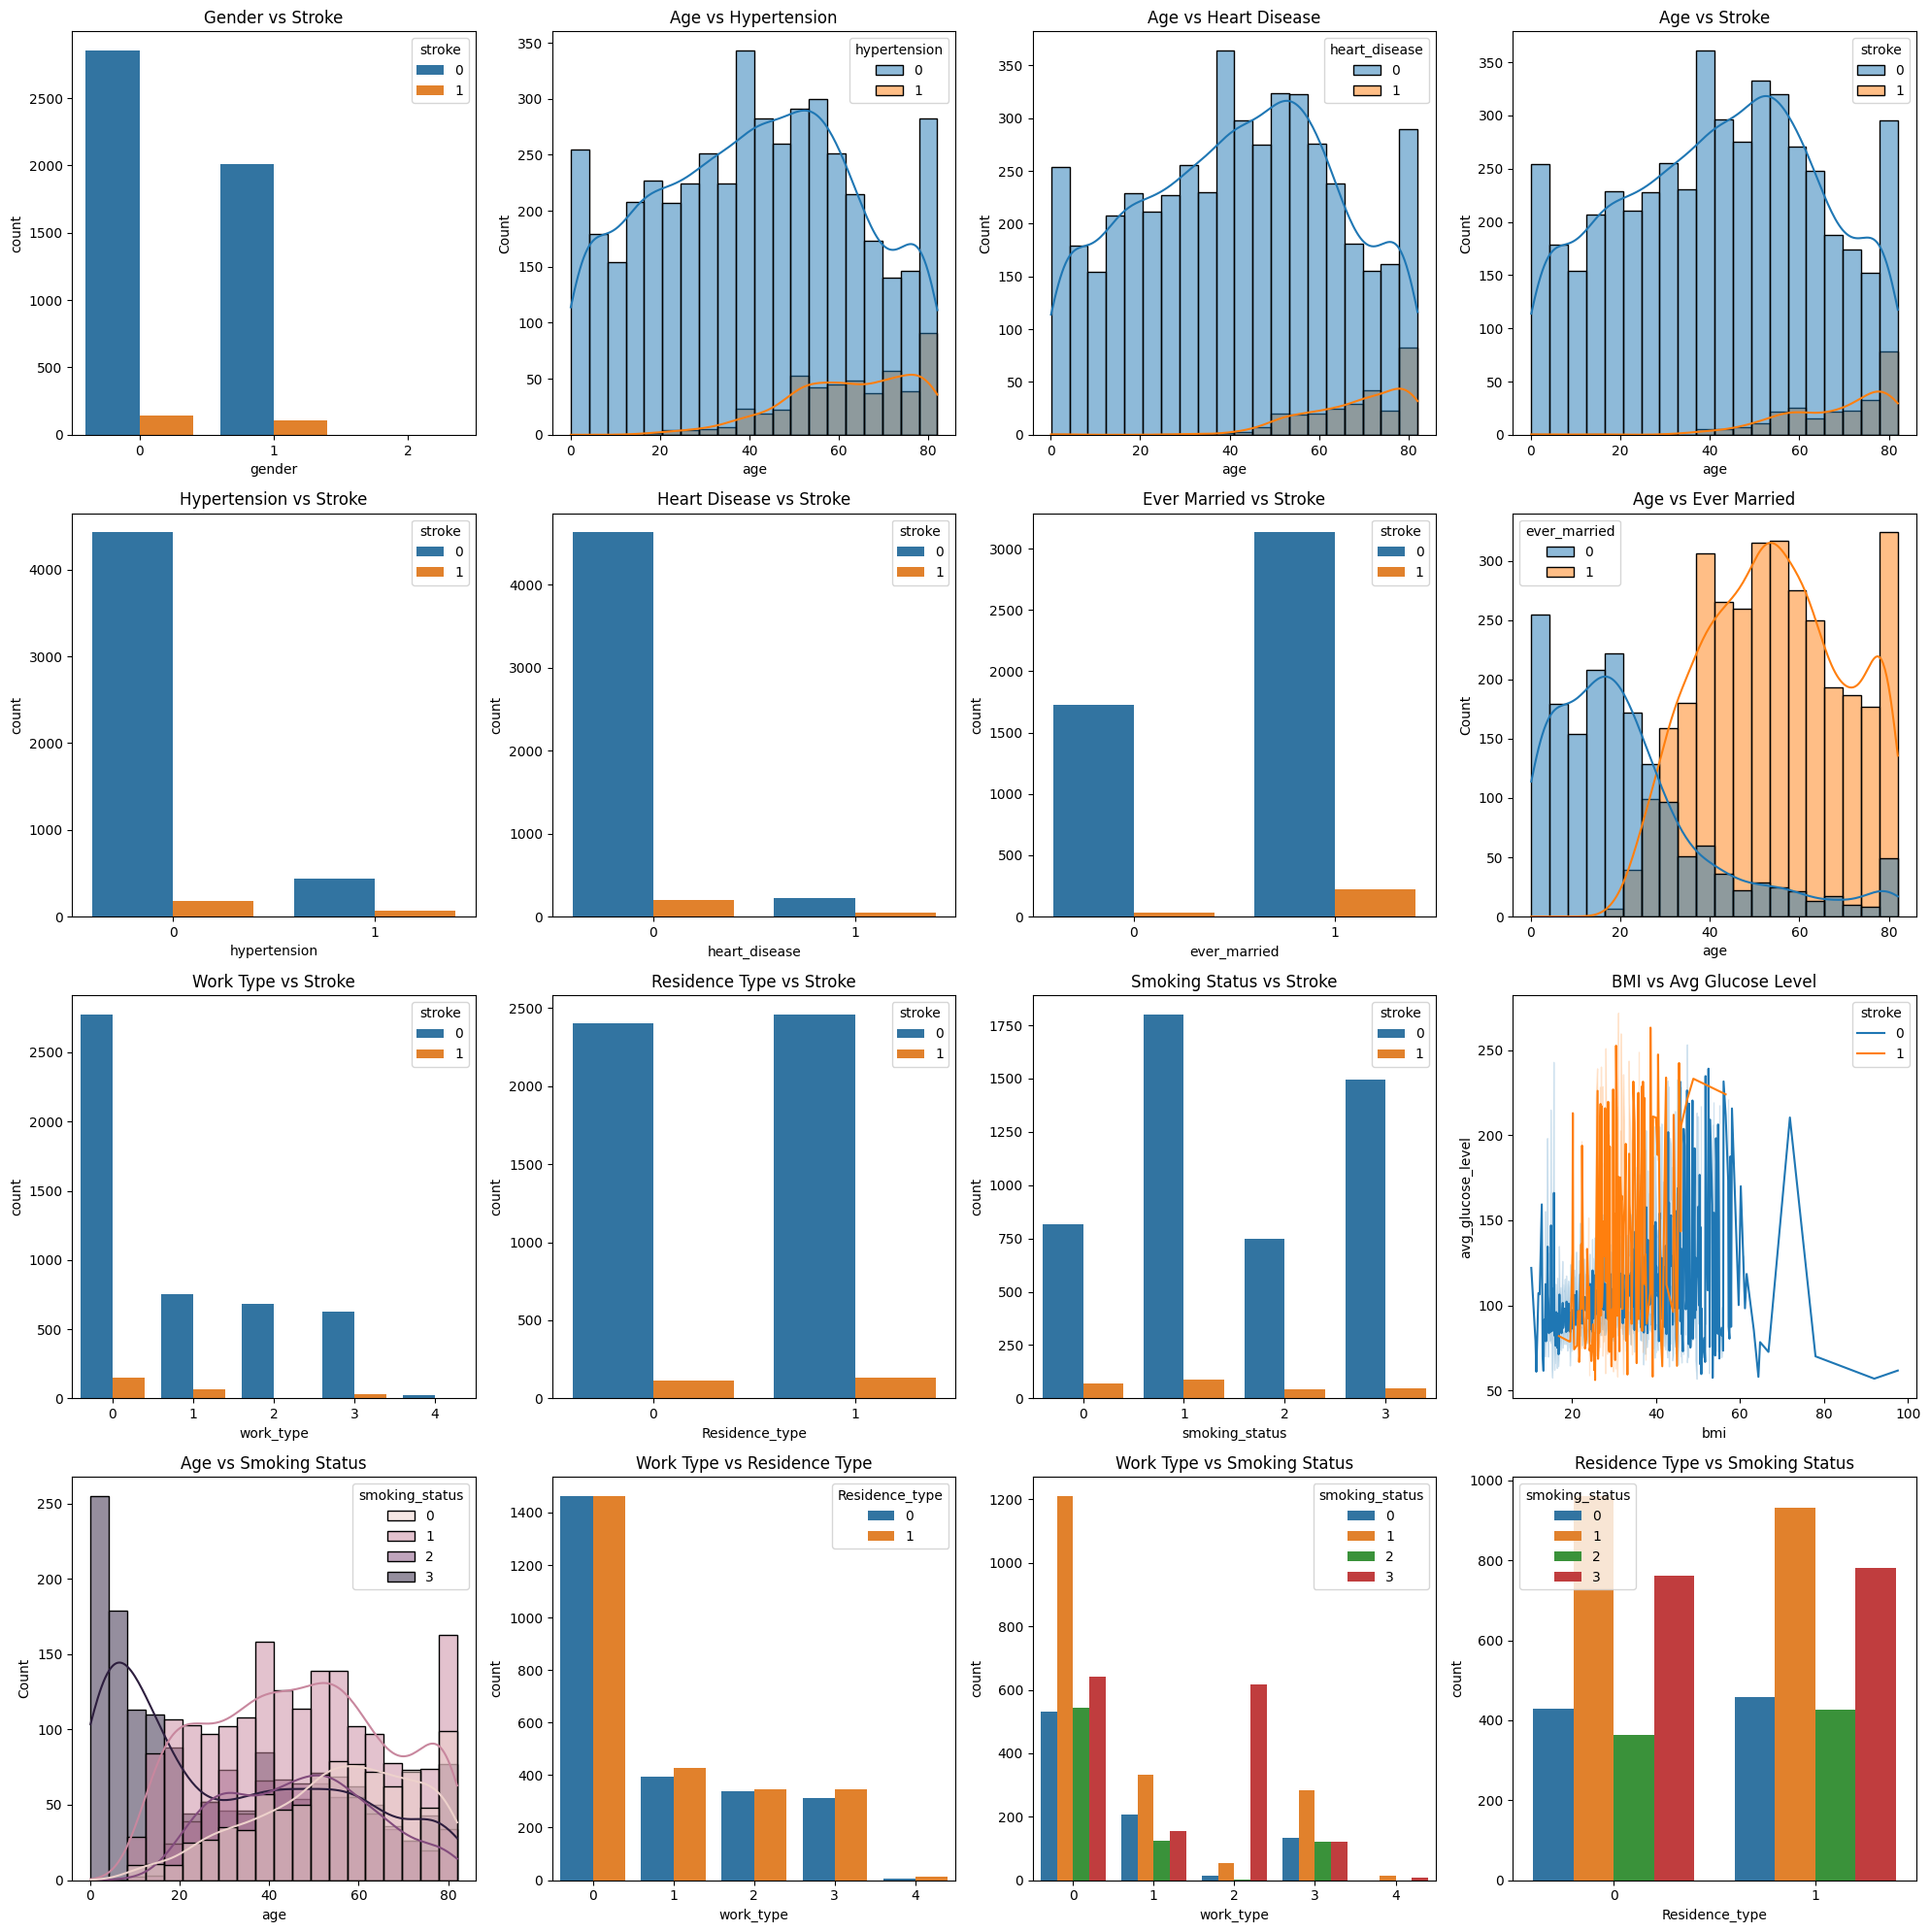

In [18]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Plot the data
sns.countplot(x='gender', data=df, hue='stroke', ax=ax[0, 0])
sns.histplot(x='age', data=df, hue='hypertension', ax=ax[0, 1], kde=True)
sns.histplot(x='age', data=df, hue='heart_disease', ax=ax[0, 2], kde=True)
sns.histplot(x='age', data=df, hue='stroke', ax=ax[0, 3], kde=True)
sns.countplot(x='hypertension', data=df, hue='stroke', ax=ax[1, 0])
sns.countplot(x='heart_disease', data=df, hue='stroke', ax=ax[1, 1])
sns.countplot(x='ever_married', data=df, hue='stroke', ax=ax[1, 2])
sns.histplot(x='age', data=df, hue='ever_married', ax=ax[1, 3], kde=True)
sns.countplot(x='work_type', data=df, hue='stroke', ax=ax[2, 0])
sns.countplot(x='Residence_type', data=df, hue='stroke', ax=ax[2, 1])
sns.countplot(x='smoking_status', data=df, hue='stroke', ax=ax[2, 2])
sns.lineplot(x='bmi', y='avg_glucose_level', data=df, hue='stroke', ax=ax[2, 3])
sns.histplot(x='age', data=df, hue='smoking_status', ax=ax[3, 0], kde=True)
sns.countplot(x='work_type', data=df, hue='Residence_type', ax=ax[3, 1])
sns.countplot(x='work_type', data=df, hue='smoking_status', ax=ax[3, 2])
sns.countplot(x='Residence_type', data=df, hue='smoking_status', ax=ax[3, 3])

# Set titles for each subplot for better understanding
ax[0, 0].set_title('Gender vs Stroke')
ax[0, 1].set_title('Age vs Hypertension')
ax[0, 2].set_title('Age vs Heart Disease')
ax[0, 3].set_title('Age vs Stroke')
ax[1, 0].set_title('Hypertension vs Stroke')
ax[1, 1].set_title('Heart Disease vs Stroke')
ax[1, 2].set_title('Ever Married vs Stroke')
ax[1, 3].set_title('Age vs Ever Married')
ax[2, 0].set_title('Work Type vs Stroke')
ax[2, 1].set_title('Residence Type vs Stroke')
ax[2, 2].set_title('Smoking Status vs Stroke')
ax[2, 3].set_title('BMI vs Avg Glucose Level')
ax[3, 0].set_title('Age vs Smoking Status')
ax[3, 1].set_title('Work Type vs Residence Type')
ax[3, 2].set_title('Work Type vs Smoking Status')
ax[3, 3].set_title('Residence Type vs Smoking Status')

# Adjust layout
plt.tight_layout()
plt.show()

## Train test Split

In [19]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [20]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 10)
(1022, 10)
(4088,)
(1022,)


In [23]:
scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [24]:
def plot_matrics(y_test,y_pred):

    print(accuracy_score(y_test,y_pred))
    print("----------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------")
    print(confusion_matrix(y_test,y_pred))
    

## Model Building and Training

### Logistic Regression

In [26]:
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,y_train)

# Testing the model object
lr_pred = classifier.predict(X_test)

# Displaying Reports
plot_matrics(y_test,lr_pred)

0.9373776908023483
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----------------------------
[[958   2]
 [ 62   0]]


### Logistic Regression (Scaled Data)

In [27]:
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train_scale,y_train)

# Testing the model object
logr_pred = classifier.predict(X_test_scale)

# Displaying Reports
plot_matrics(y_test,logr_pred)

0.9393346379647749
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----------------------------
[[960   0]
 [ 62   0]]


### Decision Tree

In [28]:
#create a model object
dt_model = DecisionTreeClassifier()

#train the model object
dt_model.fit(X_train,y_train)

# Testing the model object
dt_pred = dt_model.predict(X_test)

# Displaying Reports
plot_matrics(y_test,dt_pred)

0.9050880626223092
----------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.18      0.16      0.17        62

    accuracy                           0.91      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.90      0.91      0.90      1022

----------------------------
[[915  45]
 [ 52  10]]


## Decision Tree (Scaled Data)

In [29]:
#create a model object
dt_model = DecisionTreeClassifier()

#train the model object
dt_model.fit(X_train_scale,y_train)

# Testing the model object
dts_pred = dt_model.predict(X_test_scale)

# Displaying Reports
plot_matrics(y_test,dts_pred)

0.9119373776908023
----------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.22      0.18      0.20        62

    accuracy                           0.91      1022
   macro avg       0.58      0.57      0.57      1022
weighted avg       0.90      0.91      0.91      1022

----------------------------
[[921  39]
 [ 51  11]]


## RandomForest

In [30]:
#create a model object
rf_model = RandomForestClassifier(n_estimators=800)

#train the model object
rf_model.fit(X_train_scale,y_train)

# Testing the model object
rf_pred = rf_model.predict(X_test_scale)

# Displaying Reports
plot_matrics(y_test,rf_pred)

0.9383561643835616
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----------------------------
[[959   1]
 [ 62   0]]


## Creating a model building function

In [31]:
def build_model(model, X_train, y_train, X_test, y_test):
    
    #train the model object
    model.fit(X_train,y_train)
    
    # Testing the model object
    Y_pred = model.predict(X_test)
    
    # Displaying Reports
    plot_matrics(y_test,Y_pred)

## BaggingCLassifier

In [32]:
bg = BaggingClassifier()
build_model(bg, X_train, y_train, X_test, y_test)

0.9383561643835616
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

----------------------------
[[958   2]
 [ 61   1]]


## ExtraTreesClasifier

In [33]:
xt = ExtraTreesClassifier()
build_model(xt, X_train, y_train, X_test, y_test)

0.9344422700587084
----------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.14      0.02      0.03        62

    accuracy                           0.93      1022
   macro avg       0.54      0.50      0.50      1022
weighted avg       0.89      0.93      0.91      1022

----------------------------
[[954   6]
 [ 61   1]]


## GradientBoostingClassifier

In [34]:
gb = GradientBoostingClassifier()
build_model(gb, X_train, y_train, X_test, y_test)

0.9383561643835616
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----------------------------
[[959   1]
 [ 62   0]]


## AdaBoostClassifier

In [35]:
ad = AdaBoostClassifier()
build_model(ad, X_train, y_train, X_test, y_test)

0.9393346379647749
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----------------------------
[[960   0]
 [ 62   0]]


## VotingClassifier

In [36]:
# create the sub models
estimators = []
model1 = DecisionTreeClassifier(criterion="gini", random_state=10)
estimators.append(('cart', model1))
model2 = SVC(kernel="rbf", C=50, gamma=0.1)
estimators.append(('svm', model2))
model3 = KNeighborsClassifier(n_neighbors=8)
estimators.append(('knn', model3))

In [37]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
y_pred=ensemble.predict(X_test)
#print(Y_pred)

In [38]:
plot_matrics(y_test, y_pred)

0.9354207436399217
----------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.17      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.89      0.94      0.91      1022

----------------------------
[[955   5]
 [ 61   1]]


### Support Vector Machine (SVM)

In [39]:

from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [40]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9393346379647749

In [41]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

### K-Nearest Neighbors (KNN)

In [43]:
#create a model object
knn_model = KNeighborsClassifier()

#train the model object
knn_model.fit(X_train_scale,y_train)

# Testing the model object
knn_pred = knn_model.predict(X_test_scale)

# Displaying Reports
plot_matrics(y_test,knn_pred)

0.9373776908023483
----------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----------------------------
[[958   2]
 [ 62   0]]


## Model Comparison

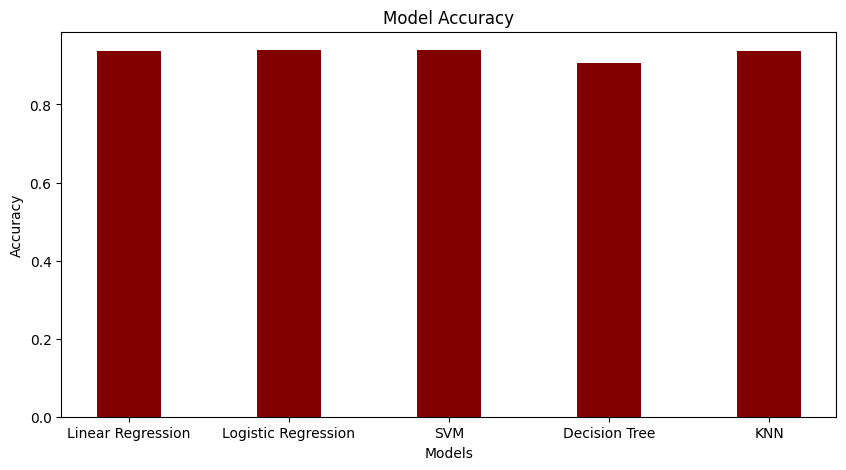

In [46]:
models = ['Linear Regression','Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, logr_pred) ,accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

The model accuracies of Linear Regression, Logistic Regression, SVM and KNN  are quite similar i.e. 93.8 %. The accuracy of Decision Tree Classifier is 91.8 %. So, we can use any of these models to predict the heart stroke.

According to the graphs age v/s hypertension, heart disease showing chances of stroke, the number of person having a stroke shows dependece upon heart disease and hypertension. But when we plot the graph of heart disease and hypertension against the stroke, the persons with lower chances of hypertension and heart disease has increased chances of stroke. This is a peculiar thing and needs to be investigated further. In addition to that non somkers have higher chances of stroke than smokers. This is also a peculiar thing and needs to be investigated further. However person having BMI between20 to 50 have higher chances of stroke.

Last but not least other features such as martial status, residence type as well as work type are showing effect on the chances of stroke.